{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

/home/atonixdevmaster/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                  Feature      Score
0                     age   4.891340
1                     sex   6.242316
2                trestbps   2.033103
3                    chol   0.865753
4                     fbs   1.973558
5                 thalach  19.118957
6                 oldpeak  26.237399
7                      ca  27.916982
8                    cp_1   1.335688
9                    cp_2   5.347054
10                   cp_3   8.394486
11                   cp_4  29.526169
12              restecg_0   3.986647
13              restecg_1   1.670468
14              restecg_2   3.239451
15                exang_0  19.046004
16                exang_1  19.046004
17                slope_1  15.841956
18                slope_2  11.874312
19                slope_3   1.489745
20               thal_3.0  30.937519
21  thal_4.73421926910299   0.783376
22               thal_6.0   2.974883
23               thal_7.0  24.991575
        age       sex  trestbps      chol       fbs   thalach   oldpeak  \


/home/atonixdevmaster/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/atonixdevmaster/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Best parameters: {'C': 1}


/home/atonixdevmaster/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/atonixdevmaster/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/atonixdevmaster/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy: 0.45901639344262296
ROC AUC Score: 0.8605390940013973
Confusion Matrix:
 [[23  3  2  1  0]
 [ 5  0  2  5  0]
 [ 2  2  1  4  0]
 [ 0  3  0  4  0]
 [ 0  1  0  3  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.00      0.00      0.00        12
           2       0.20      0.11      0.14         9
           3       0.24      0.57      0.33         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.24      0.30      0.25        61
weighted avg       0.42      0.46      0.43        61



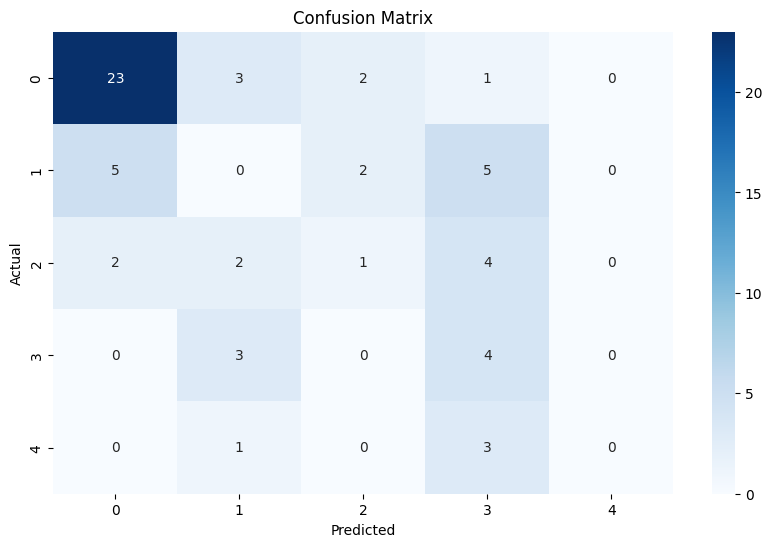

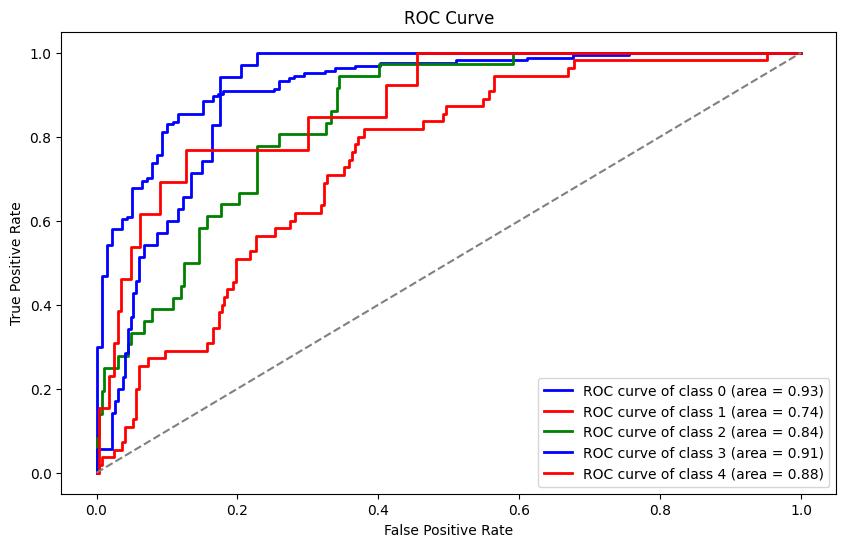

:Histogram   [age]   (Count)

In [1]:
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import panel as pn
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas DataFrames)
X = heart_disease.data.features
y = heart_disease.data.targets

# Metadata
print(heart_disease.metadata)

# Variable information
print(heart_disease.variables)

# Display first few rows
print(X.head())
print(y.head())

# Basic statistics
print(X.describe())

# Check for missing values
print(X.isnull().sum())

# Fill missing values (if any)
X = X.fillna(X.mean())

# Encode categorical variables
categorical_features = ['cp', 'restecg', 'exang', 'slope', 'thal']
X = pd.get_dummies(X, columns=categorical_features)

# Verify the cleaning process
print(X.head())

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores)

# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Verify the feature engineering process
print(X_scaled.head())

# Ensure the target variable is 1D
y = y.values.ravel()

# Binarize the target variable for ROC curves
y_bin = label_binarize(y, classes=np.unique(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Initialize the model
model = best_model

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_bin, model.predict_proba(X_scaled), multi_class='ovr')

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], model.predict_proba(X_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot the age distribution with hvplot
X['age'].hvplot.hist(bins=20, title='Age Distribution').opts(width=600, height=400)


Generating '/tmp/nsys-report-1670.qdstrm'
[1/1] [========================100%] chemon_2025-02-27T16:03:33.nsys-rep
Generated:
    /home/atonixdevmaster/atonixcorpvm/quetzal/Workshop/Quetzal/chemon_2025-02-27T16:03:33.nsys-rep
